In [3]:
## all imports
from IPython.display import HTML
from IPython.display import Image
import numpy as np
#import urllib2
import urllib.request
import bs4 #this is beautiful soup
from bs4 import BeautifulSoup
import time
import operator
import socket
#import cPickle
import _pickle as cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

import numpy as np
from numpy.random import randint

import time
from urllib.request import Request, urlopen

#from secret import *

#LIBRARY FOR NLP
from newspaper import Article
from gensim import corpora
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.lsimodel import LsiModel
from urllib.error import  URLError
import newspaper

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

#WORKING WITH STRING
import unicodedata

#TOKENIZE WORDS
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from string import digits

In [4]:
search_key_words = input("Input the keywords you want to search from online local newspapers: ")

Input the keywords you want to search from online local newspapers: marijuana


In [5]:
#READ THE LIST OF NEWSPAPERS
df = pd.read_csv('local_newspapers.csv')
df.head()

#SET SEARCH KEY WORDS (WE GO FOR EXACT MATCH HERE)
search_key_words = "marijuana"

#SET MAX NUMBER OF ARTICLES PER NEWSPAPER
num_articles = 10 

#SET NUMBER OF TOPICS TO USE IN PCA LATER
num_topics = 20
max_n_grams = 2 #cluster of words 
min_words_article = 100 #minimum number of words and phrases in an article for it to be valid

#CREATE STOP-WORDS LIST
stoplist_tw=['get', 'got', 'hey', 'hmm', 'hoo', 'let', 'ooo', 'par',
    'yer', 'didn', 'one', 'com', 'new', 'like', 'great',
    'make', 'top', 'awesome', 'best', 'good', 'wow', 'yes',
    'say', 'yay', 'would', 'thanks', 'thank', 'use',
    'should', 'could','best','really','see','want','nice',
    'while','know', 'trump', 'nyfw', 'iphone', 'hurricane',
    'rt', 'per', 'espn', 'soundcloud', 'ten', 'count', 
    'advance', 'newsletter','thedish', 'nycwff', 'thefword',
    'irma', 'fave', 'beer', 'stefan', 'aiga',
    'aigatogether', 'aigadesignconf', 'aigadg', 'aigagala',
    'ddc', 'tbt', 'whitneybiennial', 'calder', 'wknd',
    'pipilottirist', 'live', 'watch', 'check', 'video',
    'clip', 'today', 'tonight', 'week', 'year', 'month',
    'time', 'last', 'night', 'morning', 'yesterday',
    'tomorrow', 'day', 'first', 'love', 'nyc', 'city',
    'york', 'new', 'happy', 'need', 'look', 'back', 'right',
    'win', 'chance', 'enter', 'ever','pst','wha','yep', 'via',
    'app', 'twitter', 'streaming', 'stream', 'ask', 'amp',
    'beautiful', 'best', 'amazing', 'good', 'perfect', 'cute',
    'simple', 'love', 
    "alabama","alaska","arizona","arkansas","california","colorado",
    "connecticut","delaware","florida","georgia","hawaii","idaho","illinois",
    "indiana","iowa","kansas","kentucky","louisiana","maine","maryland",
    "massachusetts","michigan","minnesota","mississippi","missouri","montana",
    "nebraska","nevada","new hampshire","new jersey","new mexico","new york",
    "north carolina","north dakota","ohio","oklahoma","oregon","pennsylvania",
    "rhode island","south carolina","south dakota","tennessee","texas","utah",
    "vermont","virginia","washington","west virginia","wisconsin","wyoming",
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "brooklyn","jackson hole","hole", "blocker"
    "headline","headlines","news","article","author","date","weekly","daily","monthly", "whitelist",
    "subscription","subscriptions","subscribers","subscribe","email","mailing list","cookie","policy","privacy"
]

stoplist = set(stopwords.words('english') + stoplist_tw)

article_stop_list = ['january','february','march','april','may','june','july','august','september','october','november','december',
               'jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec',
               'published','updated','by','editor\'s','email:']

In [125]:
#FIRST READ THE NEWSPAPER
df = pd.read_csv('local_newspapers.csv')
stoplist = stoplist | set(x.lower() for x in df['name1'])
stoplist = stoplist | set(x.lower() for x in df['name2'])
for x in df['name2']:
    stoplist = stoplist | set(y.lower() for y in x.split())
#stoplist1 = []
#for x in stoplist:
#    stoplist1.append(str(x).lower())
#stoplist = set(stoplist1)

In [4]:
#TRANSOFRM THE PARAMETERS BEFORE GOING TO SEARCH 
search_key_words = "\"" + search_key_words.replace(" ","+") + "\""
df['newspaper_search'] = df['newspaper'].apply(lambda x: x.replace("/","%2F"))

#READ THE GOOGLE RESULT PAGE
sources = []
for newspaper in df.newspaper_search:
    url = 'https://google.com/search?q=' + newspaper + "+" + search_key_words
    time.sleep(np.random.rand(1)+randint(0,1)) #create a random value between o and 1
    print(url)
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    sources.append(urlopen(req).read())

#url = 'http://www.crummy.com/software/BeautifulSoup' #define a url as a string
#source = urllib2.urlopen(url).read() #reads the data from this url using urllib library

https://google.com/search?q=www.latimes.com+"marijuana"
https://google.com/search?q=www.sfchronicle.com+"marijuana"
https://google.com/search?q=www.utsandiego.com+"marijuana"
https://google.com/search?q=www.ocregister.com+"marijuana"
https://google.com/search?q=www.sfgate.com+"marijuana"
https://google.com/search?q=www.sacbee.com+"marijuana"
https://google.com/search?q=www.sfexaminer.com+"marijuana"
https://google.com/search?q=www.mercurynews.com+"marijuana"
https://google.com/search?q=www.fresnobee.com+"marijuana"
https://google.com/search?q=www.pe.com+"marijuana"
https://google.com/search?q=www.al.com%2Fbirmingham+"marijuana"
https://google.com/search?q=www.tuscaloosanews.com+"marijuana"
https://google.com/search?q=www.montgomeryadvertiser.com+"marijuana"
https://google.com/search?q=www.dothaneagle.com+"marijuana"
https://google.com/search?q=www.timesdaily.com+"marijuana"
https://google.com/search?q=www.decaturdaily.com+"marijuana"
https://google.com/search?q=www.annistonstar.com+"ma

In [5]:
#PROCESS ALL THE RESULT PAGES INTO STRING TYPE
trees = []
for source in sources:
    soup = bs4.BeautifulSoup(source, 'html.parser')
    tree = soup.prettify()
    trees.append(tree)

In [6]:
print(len(trees))

49


In [7]:
#NOW GET ALL THE LINKS OUT OF THE SEARCH RESULTS

df['links']=""
for i in range(len(df)):
    df['links'][i]=[]
    tree = trees[i]
    x1=-1
    x2=-1
    
    #scrape all the http://
    while True: 
        root_link = "?q=http://" + df['newspaper'][i]
        x1 = tree.find(root_link,x2+1)
        x2 = tree.find("&",x1+1)
        if (x1== -1) or (x2==-1):
            break
        story = tree[x1+3:x2]
        x3 = story.find(".html")
        if x3 > 0:
            story = story[0:x3+5]
        print(story)
        df['links'][i].append(story)
        
    x1=-1
    x2=-1  
    #scrape all the https://
    while True: 
        root_link = "?q=https://" + df['newspaper'][i]
        x1 = tree.find(root_link,x2+1)
        x2 = tree.find("&",x1+1)
        if (x1== -1) or (x2==-1):
            break
        story = tree[x1+3:x2]
        x3 = story.find(".html")
        if x3 > 0:
            story = story[0:x3+5]
        print(story)
        df['links'][i].append(story)

#cleanse df['links'] one more time
        
#PRINT ALL THESE LINKS TO A FILE SO THAT I DON'T HAVE TO WORRY ABOUT LOSING ACCESS AGAIN
df2 = pd.DataFrame(columns=['state','newspaper','link'])

loc = 0
for i in range(len(df)):
    for j in range(len(df['links'][i])):
        df2.loc[loc,'state'] = df.loc[i,'state']
        df2.loc[loc,'newspaper'] = df.loc[i,'newspaper']
        df2.loc[loc,'link'] = df.iloc[i]['links'][j]
        loc = loc+1

df2.to_csv('scrapped_list.csv')

http://www.latimes.com/opinion/op-ed/la-oe-angell-marijuana-democrats-20180712-story.html
http://www.latimes.com/local/lanow/la-me-ln-marijuana-status-20180423-story.html
http://www.latimes.com/style/la-lb-667-43289-la-me-ln-marijuana-status-20180423-htmlstory.html
http://www.latimes.com/opinion/op-ed/la-oe-damico-marijuana-ad-restrictions-20180618-story.html
http://www.latimes.com/business/la-fi-pot-friendly-hotels-20180622-story.html
http://www.latimes.com/business/la-fi-cannabis-real-estate-20180331-story.html
http://www.latimes.com/politics/la-na-pol-trump-marijuana-20180608-story.html
http://www.latimes.com/local/lanow/la-me-california-marijuana-sales-20180101-story.html
http://www.latimes.com/local/lanow/la-me-ln-marijuana-prep-20171231-story.html
http://www.latimes.com/local/california/la-me-ln-legal-pot-day-one-20180102-story.html
https://www.sfchronicle.com/pot-legalization/
https://www.sfchronicle.com/news/article/Federal-cannabis-bill-would-help-California-12979852.php
https

In [3]:
#JASMINE'S CUSTOM FUNCTION TO GET THE TEXT AND TITLE OF AN ARTICLE
def jasmine_scrapping(url):
    req = Request(url,headers={'User-Agent': 'Mozilla/5.0'})
    source = urlopen(req).read()
    soup = bs4.BeautifulSoup(source, 'html.parser')
    
    findh1 = soup.find('h1')
    if findh1 is not None:
        title = unicodedata.normalize("NFKD",findh1.text)
        paras = findh1.find_all_next('p')
    else:
        title = "N/A"
        paras = soup.find_all('p')
        
    if paras is not None:
        paras2 = [unicodedata.normalize("NFKD", para.text) for para in paras]
        # exclude all the empty rows, remove empty strings before and after paragraph
        paras2 = [para.lstrip() for para in paras2]
        paras2 = [para.rstrip() for para in paras2]
        paras2 = [para for para in paras2 if len(para)>=1]
        paras2 = [para for para in paras2 if para != "\n"]
        # scrape out "By Author Name" and Date:
        for i in range(min(5,len(paras2))):
            if paras2[i].split()[0].lower() in article_stop_list:
                paras2[i]='N/A'
        paras2 = [para for para in paras2 if  para!= 'N/A']
        # scrape out all the rows with less than 5 words
        start = 0
        while start < len(paras2) and len(paras2[start].split()) <=5:
            start = start+1
        if start < len(paras2):
            paras2 = paras2[start:] 
        else:
            paras2 = []
        # need to scrape out the last para that looks like:                   
        #Peter Fimrite and David Downs are San Francisco Chronicle staff writer. 
        #Email: pfimrite@sfchronicle.com, ddowns@sfchronicle.com Twitter: @pfimrite, @davidrdowns
        #if paras2[len(paras2)].split()[0].lower() in article_stop_list:
        #   paras2=paras2[:-1]
        #exclude newspaper names and Location - /  â€“ after a dash. NEED TO ADJUST THIS FUNCTION
 
        if len(paras2) >= 1:
            print(paras2[0])
            x = paras2[0].find('—')
            if x == -1:
                x = paras2[0].find('--')
                if x > -1:
                    x = x+1
            if x == -1:
                x = paras2[0].find('-')
            print(x)    
            if x > -1 and x+2 < len(paras2[0]) and paras2[0][x+1:].lstrip()[0].isupper():
                paras2[0] = paras2[0][x+1:].lstrip()
            print(paras2[0])

        # scrape out the last row with email  
        if len(paras2) >= 1:
            x = len(paras2)-1
            if paras2[x].split()[0].lower() in article_stop_list:
                paras2.pop(x)
        
        # scrape out SALT LAKE CITY (AP) " The push for legalized marijuana
        # scrape out SHREVEPORT, La. (AP) " A Louisiana / LOCATION: / WASHINGTON (AP) -- U.S. health
        # don't scrape this JOSHUA J. KNIGGE, 18, pleaded guilty
        # sometimes you could scrape into a podcad --> what to do?                               
        # poll: use my text, exclude words with less than 50 words la ok 
        # sometimes it's after a caption --> hard to find
        # http://www.rocketminer.com/news/today-s-headlines/article_87736952-5465-11e8-bbfc-2fb09ebf9807.html            
        # avoid links with "/tags/" in their 

        # when appened the paragraphs, should be separated by a " ". Example: Your Turn (Photo: St. Cloud Times) 
        paras3 = " \n".join(paras2)
    else:
        paras3 = "N/A"
                
    return title, paras3

In [4]:
def regular_scrapping(url):
    article = Article(url)
    article.download()
    count = 0
    while (article.download_state == 0) and (count < 2): #ArticleDownloadState.NOT_STARTED is 0
        time.sleep(1)
        count = count + 1
    if article.download_state == 2:
        article.parse()
        title = article.title
        story = article.text
    else:
        title = "N/A"
        story = "N/A" 
    return title, story

In [5]:
#SCRAPE ALL THE STORIES FROM EACH LINK - USING NEWSPAPER LIBRARY

df2 = pd.read_csv('scrapped_list.csv')
df2['title']=""
df2['story']=""
df3 = df2 

for i in range(len(df2)):
    url = df2.loc[i,'link']
    print(url)
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    try:
        response = urlopen(req)
    except URLError as e:
#        df2.drop(i,inplace=True)
        df3.drop(i,inplace=True)
        if hasattr(e, 'reason'):
            print('We failed to reach a server.') 
            print('Reason: ', e.reason)
        elif hasattr(e, 'code'):
            print('The server couldn\'t fulfill the request.')
            print('Error code: ', e.code)
    else:    
        df3.loc[i,'title'], df3.loc[i,'story']=jasmine_scrapping(url=url)
#        time.sleep(np.random.rand(1)+randint(0,1))
#        df2.loc[i,'title'], df2.loc[i,'story']=regular_scrapping(url=url)

#df2 = df2.reset_index(drop=True)    
#df2.to_csv('workable_link_and_stories.csv')
df3 = df3.reset_index(drop=True)    
df3.to_csv('workable_link_and_stories_jasmine.csv')


http://www.latimes.com/opinion/op-ed/la-oe-angell-marijuana-democrats-20180712-story.html
Every Democratic U.S. senator rumored to be considering a 2020 presidential run supports marijuana legalization. So do 77% of Democratic voters. The party's 2016 national platform backs states’ rights on cannabis and calls for a "reasoned pathway for future legalization."
-1
Every Democratic U.S. senator rumored to be considering a 2020 presidential run supports marijuana legalization. So do 77% of Democratic voters. The party's 2016 national platform backs states’ rights on cannabis and calls for a "reasoned pathway for future legalization."
http://www.latimes.com/local/lanow/la-me-ln-marijuana-status-20180423-story.html
Months after California legalized the marijuana business, pot growers and manufacturers lament that they are still locked out of the legal industry in Los Angeles.
-1
Months after California legalized the marijuana business, pot growers and manufacturers lament that they are stil

Bay Area marijuana retailers who went fully mainstream this month were forced to act like gangsters anyway as they rumbled down freeways and across bridges in sport utility vehicles and sedans and, in at least one case, a Tesla, bearing cash piled in shopping bags and suitcases.
-1
Bay Area marijuana retailers who went fully mainstream this month were forced to act like gangsters anyway as they rumbled down freeways and across bridges in sport utility vehicles and sedans and, in at least one case, a Tesla, bearing cash piled in shopping bags and suitcases.
http://www.ocregister.com/marijuana-shops-will-have-glut-of-cheap-weed-followed-by-a-possible-shortage
Cannabis consumers soon should be able to shop at licensed stores in California without worrying about whether products on the shelves are laced with pesticides and other contaminants often found in black-market weed.
204
Cannabis consumers soon should be able to shop at licensed stores in California without worrying about whether p

Eight years ago, Samantha Miller was earning six figures a year as a product developer for a LED lighting company in Northern California when a high school friend called to ask a favor. Would Miller be able to help her friend's boss at a medical marijuana dispensary figure out how to use a new machine purchased to analyze the quality of pot?
-1
Eight years ago, Samantha Miller was earning six figures a year as a product developer for a LED lighting company in Northern California when a high school friend called to ask a favor. Would Miller be able to help her friend's boss at a medical marijuana dispensary figure out how to use a new machine purchased to analyze the quality of pot?
https://www.sacbee.com/news/article213818444.html
The canine soldiers in Sacramento's booming marijuana wars snarl and yap inside their kennels at the Front Street Animal Shelter.
-1
The canine soldiers in Sacramento's booming marijuana wars snarl and yap inside their kennels at the Front Street Animal Shelt

California legalized marijuana in 2016, and this past New Year’s Eve eager customers lined up in the darkness outside medical marijuana dispensaries across the state, ready to start shopping at the stroke of midnight.
-1
California legalized marijuana in 2016, and this past New Year’s Eve eager customers lined up in the darkness outside medical marijuana dispensaries across the state, ready to start shopping at the stroke of midnight.
https://www.mercurynews.com/2018/07/27/first-tests-are-in-and-one-in-five-marijuana-samples-in-california-isnt-making-grade/
One in five batches of marijuana has failed laboratory testing since new state safety requirements kicked in on July 1, according to data from the California Bureau of Cannabis Control.
-1
One in five batches of marijuana has failed laboratory testing since new state safety requirements kicked in on July 1, according to data from the California Bureau of Cannabis Control.
https://www.mercurynews.com/2018/07/14/cannabis-delivery-edib

Seven men and a woman are accused of illegally operating multiple indoor marijuana grows in Murrieta.
-1
Seven men and a woman are accused of illegally operating multiple indoor marijuana grows in Murrieta.
https://www.pe.com/tag/marijuana/
https://www.pe.com/2018/07/10/riverside-permanently-bans-marijuana-dispensaries-outdoor-growing/
No marijuana dispensaries, no commercial marijuana cultivation and no outdoor growing of marijuana will be allowed in Riverside, the City Council decided Tuesday, July 10.
-1
No marijuana dispensaries, no commercial marijuana cultivation and no outdoor growing of marijuana will be allowed in Riverside, the City Council decided Tuesday, July 10.
https://www.pe.com/2018/06/18/a-proposed-law-would-allow-many-marijuana-business-in-unincorporated-riverside-county/
Riverside County is considering a cannabis ordinance that would be among the most permissive in California, allowing just about every type of marijuana business permitted by state law to operate in 

The biggest problem with an effort by Tuscaloosa leaders to relax penalties for marijuana possession is that it makes entirely too much sense. Well, that, and the fact that Tuscaloosa leaders don’t have home rule and can’t make such a change without the Legislature voting to approve it. That means it would be needlessly politicized with the usual banter of misinformation that often stymies any effort for sensible change in our state.Last Thursday, Tuscaloosa Mayor Walt Maddox and the City Council hosted state lawmakers from West Alabama for an annual breakfast that traditionally happens shortly before the legislators begin a session.One of the topics discussed was the problem Tuscaloosa has with jail overcrowding. This city is not alone in that. It is a problem throughout the state, but here locally it is at a crisis level. The mayor noted that the criminal justice system is overwhelmed. A huge contributing factor in that problem is that in Alabama if you’re caught with even a small am

LIPSCOMB — An Alabama police chief is on leave after authorities reported finding marijuana and drug paraphernalia in his patrol car and home.
9
An Alabama police chief is on leave after authorities reported finding marijuana and drug paraphernalia in his patrol car and home.
http://www.tuscaloosanews.com/news/20180202/records-detail-ua-players-marijuana-possession-arrest
A University of Alabama football player arrested earlier this week was charged after police found less than a tenth of a gram of marijuana in his dorm room, according to court records.Officers found 0.08 grams of marijuana locked in a safe after freshman tight end Major Tennison let them search his room in the athletic dorm late Jan. 28.Tennison, 19, was in his first-floor room at Bryant Hall when an officer working in the lobby smelled marijuana at 11:21 p.m., according to records filed Friday in Tuscaloosa County District Court.The officer knocked on the door to the room because it is adjacent to the lobby, accordin

Alabama tight end Major Tennison arrest mugshot. He was arrested Tuesday on a charge of second-degree possession of marijuana — a Class A misdemeanor — according to the Tuscaloosa County Sheriff's Office.(Photo: Tuscaloosa County Sheriff's Office.)
126
Alabama tight end Major Tennison arrest mugshot. He was arrested Tuesday on a charge of second-degree possession of marijuana — a Class A misdemeanor — according to the Tuscaloosa County Sheriff's Office.(Photo: Tuscaloosa County Sheriff's Office.)
http://www.montgomeryadvertiser.com/story/news/crime/2017/08/01/man-arrested-day-street-drug-bust/530111001/
Elvis Anthony is charged with trafficking illegal drugs(Photo: .)
-1
Elvis Anthony is charged with trafficking illegal drugs(Photo: .)
https://www.montgomeryadvertiser.com/topic/5ae2b778-f3df-40f8-a83d-9646b6abff45/marijuana-in-oregon/
More employers dropping pot from drug tests
-1
More employers dropping pot from drug tests
https://www.montgomeryadvertiser.com/topic/8bedd55d-b7ab-4916-

FLORENCE – Information from another agency helped local drug authorities arrest a Lauderdale County man who is accused of ordering high-grade marijuana over the internet.
135
FLORENCE – Information from another agency helped local drug authorities arrest a Lauderdale County man who is accused of ordering high-grade marijuana over the internet.
http://www.timesdaily.com/news/crime/florence-man-sentenced-for-buying-marijuana-online/article_a1289ecf-f1cd-5eb7-89c8-1ec19bb2bde1.html
FLORENCE — A local man charged with purchasing “high-grade” marijuana over the internet will serve three years in prison.
9
A local man charged with purchasing “high-grade” marijuana over the internet will serve three years in prison.
http://www.timesdaily.com/news/crime/muscle-shoals-chief-gummy-marijuana-being-sold-to-teens/article_83165a1e-2c6e-59f6-9e73-4d0d3da98fd9.html
Muscle Shoals Police, along with members of the Colbert County Drug Task Force Agency, seized gummy marijuana, marijuana wax, and a pistol

Heflin bust Saturday morning on Interstate 20. Officers found numerous THC-laced edibles and marijuana during a traffic stop. Officers Chris Cohran and Tyler Murphy with the confiscated items. (Bill Wilson / The Anniston Star)
74
Heflin bust Saturday morning on Interstate 20. Officers found numerous THC-laced edibles and marijuana during a traffic stop. Officers Chris Cohran and Tyler Murphy with the confiscated items. (Bill Wilson / The Anniston Star)
https://www.annistonstar.com/the_daily_home/dh_news/childersburg-woman-jailed-since-may-charged-with-xanax-marijuana-possession/article_65936a86-894d-11e8-9346-e3a30f11d8ad.html
A Childersburg woman incarcerated in the Talladega County Jail since May on a disorderly conduct charge is now facing felony contraband charges.
-1
A Childersburg woman incarcerated in the Talladega County Jail since May on a disorderly conduct charge is now facing felony contraband charges.
https://www.annistonstar.com/opinion/decriminalize-marijuana/article_5e1

More than 120 pounds of marijuana has been seized in Etowah County during a three-week investigation by the Etowah County Drug Enforcement Unit, and two people are charged with trafficking in the drug.
81
More than 120 pounds of marijuana has been seized in Etowah County during a three-week investigation by the Etowah County Drug Enforcement Unit, and two people are charged with trafficking in the drug.
http://www.gadsdentimes.com/article/20140627/News/603235512
In the late ’90s and early ’00s, methamphetamine became the big enemy on the drug front. It started with “dirty” low-potency meth cooked in kitchens or small labs and morphed into a mass-produced, high-potency product coming from Mexico, with purity that increased from 40 percent to 90 percent.
116
In the late ’90s and early ’00s, methamphetamine became the big enemy on the drug front. It started with “dirty” low-potency meth cooked in kitchens or small labs and morphed into a mass-produced, high-potency product coming from Mex

A new law went into effect Thursday that provides greater penalties for crimes related to synthetic marijuana, known as Spice.
-1
A new law went into effect Thursday that provides greater penalties for crimes related to synthetic marijuana, known as Spice.
https://www.al.com/news/index.ssf/2018/02/bill_would_reduce_alabama_pena.html
A bill that would reduce the penalty for marijuana possession in Alabama is scheduled for consideration on Wednesday by both the House and Senate judiciary committees.
-1
A bill that would reduce the penalty for marijuana possession in Alabama is scheduled for consideration on Wednesday by both the House and Senate judiciary committees.
https://www.al.com/news/birmingham/index.ssf/2017/04/marijuana_in_alabama_debate_st.html
Discussing marijuana in Alabama strikes a deep chord, with supporters enthusiastic about its possible benefits, and opponents worried that a national trend toward legalization might sweep into the state.
-1
Discussing marijuana in Alabam

Thousands of people with misdemeanor convictions for marijuana possession dating back 40 years will have their criminal records cleared, the San Francisco district attorney’s office said Wednesday. San Diego is also forgiving old convictions.
-1
Thousands of people with misdemeanor convictions for marijuana possession dating back 40 years will have their criminal records cleared, the San Francisco district attorney’s office said Wednesday. San Diego is also forgiving old convictions.
https://www.nytimes.com/2018/06/21/nyregion/marijuana-the-signature-olfactory-experience-of-new-york.html
A few years ago when I served on the board of the co-op building where I live in Brooklyn Heights — a fact suggesting a degree of squareness so profound it should discredit my authority to go on — my next-door neighbor came to me with recurring complaints that her apartment, at various points, but mostly in the evenings, reeked of pot (that, children, is what we of the Atari generation call it) so inte

Respect for the NYPD may be going up in smoke.
-1
Respect for the NYPD may be going up in smoke.
http://www.nydailynews.com/news/ny-news-canada-legalizes-pot-sales-20180620-story.html
TORONTO — Canada’s Senate gave final passage Tuesday to the federal government’s bill to legalize cannabis, though Canadians will have to wait at least a couple of months to legally buy marijuana as their country becomes the second in the world to make pot legal nationwide.
8
Canada’s Senate gave final passage Tuesday to the federal government’s bill to legalize cannabis, though Canadians will have to wait at least a couple of months to legally buy marijuana as their country becomes the second in the world to make pot legal nationwide.
http://www.nydailynews.com/news/national/legalizing-pot-fun-stanky-smoke-article-1.3998945
How is it that the very people who can smell a cigarette from 25 feet and start waving their arms and complaining that their air is being polluted are all for legalizing weed so it ca

Marijuana is the latest boom industry, but turning green into gold comes with risks.
    James Nash
-1
Marijuana is the latest boom industry, but turning green into gold comes with risks.
    James Nash
https://www.democratandchronicle.com/story/news/politics/albany/2018/05/25/andrew-cuomo-marijuana-timeline/632312002/
Manhattan's District Attorney Cyrus Vance says his office will largely stop prosecuting people for possessing or smoking marijuana starting Aug. 1. The move comes after The New York Times reported on the persistent racial gap in marijuana arrests. (May 16)
    AP
-1
Manhattan's District Attorney Cyrus Vance says his office will largely stop prosecuting people for possessing or smoking marijuana starting Aug. 1. The move comes after The New York Times reported on the persistent racial gap in marijuana arrests. (May 16)
    AP
https://www.democratandchronicle.com/story/news/politics/albany/2018/07/13/new-york-report-backing-marijuana-legalization-delivered-andrew-cuomo/782

SYRACUSE, N.Y. -- AMR ambulance crews have responded to at least 50 overdoses in the city involving the drug "spike" since Saturday, according to an official with the ambulance company.
16
AMR ambulance crews have responded to at least 50 overdoses in the city involving the drug "spike" since Saturday, according to an official with the ambulance company.
https://www.syracuse.com/health/index.ssf/2017/05/new_york_reveals_names_of_medical_marijuana_doctors.html
SYRACUSE, N.Y. -- New York has published a partial list of doctors and other providers registered to prescribe medical marijuana, information the state had been keeping under wraps.
16
New York has published a partial list of doctors and other providers registered to prescribe medical marijuana, information the state had been keeping under wraps.
http://www.startribune.com/minneapolis-cops-halt-marijuana-stings-after-almost-all-arrested-were-black/484876151/
Minneapolis police abruptly ended the practice of targeting small-scale m

https://www.twincities.com/2018/01/04/ap-newsbreak-us-to-end-policy-that-let-legal-pot-flourish/
WASHINGTON (AP) — The Trump administration threw the burgeoning movement to legalize marijuana into uncertainty Thursday as it lifted an Obama-era policy that kept federal authorities from cracking down on the pot trade in states where the drug is legal. Attorney General Jeff Sessions will now leave it up to federal prosecutors to decide what to do when state rules collide with federal drug law.
16
The Trump administration threw the burgeoning movement to legalize marijuana into uncertainty Thursday as it lifted an Obama-era policy that kept federal authorities from cracking down on the pot trade in states where the drug is legal. Attorney General Jeff Sessions will now leave it up to federal prosecutors to decide what to do when state rules collide with federal drug law.
https://www.twincities.com/2018/03/01/study-many-minnesota-patients-say-medical-marijuana-relieves-chronic-pain/
Tyesha 

Most patients who used medical marijuana during the first year of Minnesota’s tightly regulated program reported benefits, the state Health Department said Tuesday.
-1
Most patients who used medical marijuana during the first year of Minnesota’s tightly regulated program reported benefits, the state Health Department said Tuesday.
http://www.postbulletin.com/news/crime/traffic-stop-recovers-pounds-of-marijuana/article_849c36ef-2ead-5e36-bccb-22afc837f677.html
A 56-year-old woman who was arrested with 75 pounds of marijuana in her vehicle told officers someone had given it to her as "medicine for her sick husband," court documents say.
4
A 56-year-old woman who was arrested with 75 pounds of marijuana in her vehicle told officers someone had given it to her as "medicine for her sick husband," court documents say.
http://www.postbulletin.com/business/medical-marijuana-company-s-sales-slow-amid-testing-delays/article_22fca056-d371-5b53-b52a-43aea491dccb.html
In this June 17, 2015 photo, D

When Peter Carvalho quit smoking last year, it meant giving up both tobacco cigarettes and marijuana.
-1
When Peter Carvalho quit smoking last year, it meant giving up both tobacco cigarettes and marijuana.
http://www.duluthnewstribune.com/
Games • ComicsDear Abby • TV ListingsSend Editor a LetterPost Your Event ...
-1
Games • ComicsDear Abby • TV ListingsSend Editor a LetterPost Your Event ...
http://www.duluthnewstribune.com/news/world/4457858-canada-moves-one-step-closer-legalizing-recreational-marijuana
The Canadian Senate passed legislation Thursday night, June 7, that would legalize marijuana for recreational use, putting the country one step closer to making Canada the second country to fully legalize the drug.
-1
The Canadian Senate passed legislation Thursday night, June 7, that would legalize marijuana for recreational use, putting the country one step closer to making Canada the second country to fully legalize the drug.
http://www.duluthnewstribune.com/news/4439014-uc-san-d

The independent news source for the University of Minnesota campus, now only a click away. Subscribe to the Minnesota Daily's e-newsletter for full sports coverage, updates from the newsroom, and a pick of the week's top features.
127
The independent news source for the University of Minnesota campus, now only a click away. Subscribe to the Minnesota Daily's e-newsletter for full sports coverage, updates from the newsroom, and a pick of the week's top features.
http://www.mndaily.com/blog/the-newsstand/2015/03/medical-marijuana-aimed-multiple-sclerosis-epilepsy-and-cancer-patients
The independent news source for the University of Minnesota campus, now only a click away. Subscribe to the Minnesota Daily's e-newsletter for full sports coverage, updates from the newsroom, and a pick of the week's top features.
127
The independent news source for the University of Minnesota campus, now only a click away. Subscribe to the Minnesota Daily's e-newsletter for full sports coverage, updates from

The Independence Party of Minnesota has come out in favor of marijuana legalization, joining an emerging group of smaller political parties to do so.
-1
The Independence Party of Minnesota has come out in favor of marijuana legalization, joining an emerging group of smaller political parties to do so.
http://www.southernminn.com/owatonna_peoples_press/news/article_df66c776-f265-5cfd-8da4-f6d4de2a1505.html
OWATONNA — It might be legal back home in Colorado, but the 30-plus pounds of marijuana and marijuana wax police reportedly found during a traffic stop Saturday has landed two men in hot water with Steele County prosecutors.
9
It might be legal back home in Colorado, but the 30-plus pounds of marijuana and marijuana wax police reportedly found during a traffic stop Saturday has landed two men in hot water with Steele County prosecutors.
http://www.southernminn.com/owatonna_peoples_press/article_d17f6f52-4405-5658-982c-1200fff328ed.html
OWATONNA — An Owatonna man who admitted to posses

A bud tender holds two marijuana buds on his fingers on the way to a customer at the Denver Kush Club in north Denver. AP Photo/David Zalubowski
-1
A bud tender holds two marijuana buds on his fingers on the way to a customer at the Denver Kush Club in north Denver. AP Photo/David Zalubowski
https://www.wyomingnews.com/news/local_news/wyoming-dci-says-cbd-oils-legally-ambiguous/article_2acbdb50-46b7-11e8-a204-031b39da0de7.html
This May 23, 2017, photo shows GW Pharmaceuticals’ Epidiolex, a medicine made from the marijuana plant but without THC. On April 19 a panel of Food and Drug Administration health advisers recommended approval of the drug, moving the closely watched medication closer to the U.S. market. Associated Press
-1
This May 23, 2017, photo shows GW Pharmaceuticals’ Epidiolex, a medicine made from the marijuana plant but without THC. On April 19 a panel of Food and Drug Administration health advisers recommended approval of the drug, moving the closely watched medication cl

ROCK SPRINGS — Erin Kay Endres, 37, of Rock Springs, died on Tuesday, Aug. 14, 2018. She was a lifelong resident of Rock Springs.
13
Erin Kay Endres, 37, of Rock Springs, died on Tuesday, Aug. 14, 2018. She was a lifelong resident of Rock Springs.
http://www.rocketminer.com/opinion/marijuana-comes-with-many-dangers/article_2ff08da2-3826-583a-8e4d-019fff56c3c6.html
Recently, while seated in a doctor’s office, I picked up a free booklet by the National Institute on Drug Abuse, National Institutes of Health entitled “Marijuana Facts for Teens.” I learned many facts that bear repeating in our world where 7 percent of American youth used marijuana last month.
-1
Recently, while seated in a doctor’s office, I picked up a free booklet by the National Institute on Drug Abuse, National Institutes of Health entitled “Marijuana Facts for Teens.” I learned many facts that bear repeating in our world where 7 percent of American youth used marijuana last month.
http://www.rocketminer.com/
Partly clo

JONATHAN DAVID MUSSER, 33, pleaded guilty June 22 to felony possession of marijuana and misdemeanor possession of THC. In a plea agreement, attorneys will jointly recommend a deferred sentence and four years of supervised probation on the felony count and an imposed 10-day jail sentence on the misdemeanor. Musser was arrested Oct. 27 when police pulled over a minivan at about 9 p.m. because it didn’t have headlights. The police officer smelled marijuana and asked the five people inside the minivan about it. Near where Musser had been sitting, police found a baggie with 7.1 grams of marijuana and a backpack with 1 gram of hash and paraphernalia. A drug dog indicated on a black filing cabinet in his office downstairs during a subsequent search of his house. That turned up 23 bags of 1⁄4-ounce portions of marijuana totaling 5.58 ounces. Elsewhere in the home, police found a bottle of liquid THC weighing 26 grams, a digital scale and loose marijuana, according to court documents.
269
JONAT

Cheyenne man arrested for felony possession of controlled substance
-1
Cheyenne man arrested for felony possession of controlled substance
http://www.laramieboomerang.com/news/on-the-record-aug/article_d759c25a-a103-11e8-aeb7-97430bf4113a.html
Zachary Barney, 26, Arizona, was arrested on a warrant from Arizona.
-1
Zachary Barney, 26, Arizona, was arrested on a warrant from Arizona.
http://www.laramieboomerang.com/news/on-the-record-july/article_60d415a2-858a-11e8-9fbd-3344f6281ca4.html
Laramie resident arrested for domestic battery, false imprisonment
-1
Laramie resident arrested for domestic battery, false imprisonment
http://www.laramieboomerang.com/news/local_news/arrest_record_and_police_calls/on-the-record-july/article_5cf4aab4-8ef9-11e8-b0ca-2b3d68d400a3.html
Robert Ridinger, 31, Laramie, was arrested on a warrant.
-1
Robert Ridinger, 31, Laramie, was arrested on a warrant.
http://www.laramieboomerang.com/news/on-the-record-july/article_acf30ccc-7f2c-11e8-8653-375b416e2cd3.html
N

In [3]:
#PROCESS THE FILES AGAIN
#create a function to make sure that we can at least find the search terms in the summary

#blend the title to the content - maybe increasing the weight to 10?

#review the scrapped link: #183 http://www.nydailynews.com/autos/bmw-green-i3-i8-electric-cars-gallery-1.45922%3FpmSlide%3D1.46077 
#180 http://www.nydailynews.com/autos/bmw-green-i3-i8-electric-cars-gallery-1.45922%3FpmSlide%3D1.46097

#remove the author names and all the common words used in the bottom 
#145 https://www.al.com/business/index.ssf/2017/11/honda_says_electric_cars_can_c.html

#exclude all the articles with less than 50 words, or have null content 

In [6]:
#CREATE MAIN FUNCTION TO TOKENIZE WORDS 

tokenizer = RegexpTokenizer(r'\w+')

def tokenize(document, max_n_grams = max_n_grams, min_word_length = 3):
    
    # removes hashtags, at-mentions, and links
    document = re.sub(
        r"(?:#|\@|https?\:\/\/|www\.)\S+",
        "",
        document
    )
    
    # put all these tokens into phrases (separated by ?.,:()\n)
    document = document.replace("\n", " ")
    document = document.replace("?",".")
    document = document.replace(",",".")
    document = document.replace(":",".")
    document = document.replace("(",".")
    document = document.replace(")",".")
    documents = document.split(".")
    token_list = [tokenizer.tokenize(doc.lower()) for doc in documents]
    
    # remove tokens that are shorter than the min_word_length
    # remove tokens that contain numbers
    # remove stop words
    token_list = [[token for token in tokens
        if (len(token) >= min_word_length) and
        (len(token.strip(digits)) == len(token)) and
        (token not in stoplist)] for tokens in token_list]
    
    token_flat = []
    for tokens in token_list:
        for token in tokens:
            token_flat.append(token)

    # collect n_grams up to the max_n_gram size, I fix this to include words in a phrase only
    token_grams = []
    if (max_n_grams > 1):
        for tokens in token_list:
            for n in range(2, max_n_grams + 1):
                for start, token in enumerate(tokens[:-1*(n-1)]):
                    gram = ''
                    end = start + n
                    for token in tokens[start:end]:
                        gram += ' ' + token
                    token_grams.append(gram.strip())
                
    return token_flat + token_grams

In [7]:
df = pd.read_csv('workable_link_and_stories_jasmine.csv')
df1 = pd.read_csv('workable_link_and_stories.csv')

In [9]:
from gensim.models.doc2vec import Doc2Vec
#model = Doc2Vec(df['story'], vector_size=5, window=2, min_count=1, workers=4)

In [10]:
#NOW READ FROM FILE AGAIN TO PROCEED, AVOIDING NULL STORY VALUES 
df = pd.read_csv('workable_link_and_stories_jasmine.csv')
df1 = pd.read_csv('workable_link_and_stories.csv')
df.reset_index(inplace= True)
df1.reset_index(inplace=True)
for i in range(len(df)):
    if df.loc[i,'title']=="N/A":
        df.loc[i,'title']=df1.loc[i,'title']
    if df.loc[i,'story']=="N/A":
        df.loc[i,'story']=df1.loc[i,'story']  
#df = df1 #IN THIS EXAMPLE, ONLY USE THE SET LIBRARY
df = df[df['story'].notnull() & df['title'].notnull()] #remove all null values
df = df[(df['story'] != "N/A") & (df['title'] != "N/A")] #remove all N/A values 
df['tokenized'] = ""
df.reset_index(inplace = True)
for i in range(len(df)):
    df['tokenized'][i] = tokenize(document = df['story'][i])
df = df[df['tokenized'].apply(len)>= min_words_article] #remove all articles with too few words
tokenized_stories = df['tokenized']
categories = df['state']

/Users/jasmine.ngo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
#NOW PUT ALL THESE INTO BAGS OF WORDS TO SEE MOST FREQUENTLY USED WORDS, SENTIMENTS
dictionary = corpora.Dictionary(tokenized_stories)
# filter out any terms only present in fewer than 5 tweets
# or present in greater than 5% of all tweets
dictionary.filter_extremes(no_below = 5, no_above = 0.05)
dictionary.compactify()

# convert tweets to bag of words
corpus = [dictionary.doc2bow(story) for story in tokenized_stories]
# train the tfidf model
tfidf = TfidfModel(corpus)

# train the LSI/LSA model
lsi = LsiModel(
    corpus = tfidf[corpus],
    id2word = dictionary,
    num_topics = num_topics
)

#We can now easily build an LSI vector representation of each timeline using the topic model. 
#While we trained the model on each individual tweet we will be vectorizing each timeline as a single document.
timeline_vectors = []
for i, timeline in enumerate(tokenized_stories):
    # convert to bag of words
    timeline_bow = dictionary.doc2bow(timeline)
    timeline_vector = lsi[tfidf[timeline_bow]]
    timeline_vectors.append(timeline_vector)

In [12]:
print(lsi.print_topics(num_topics))

[(0, '0.100*"police said" + 0.090*"decatur" + 0.088*"brewbaker" + 0.087*"fresno" + 0.069*"receive selection" + 0.068*"selection" + 0.067*"meth" + 0.064*"synthetic" + 0.061*"tuscaloosa" + 0.059*"cloud"'), (1, '-0.294*"theft" + -0.278*"arrested suspicion" + -0.264*"block north" + -0.259*"suspicion" + -0.230*"accident" + -0.187*"boomerang" + -0.174*"vandalism" + -0.161*"arrested warrant" + -0.160*"domestic" + -0.153*"possible domestic"'), (2, '-0.505*"police said" + -0.487*"decatur" + -0.207*"decatur police" + -0.206*"morgan county" + -0.204*"morgan" + -0.161*"ratings decatur" + -0.161*"decatur area" + -0.123*"jail bail" + -0.118*"bail set" + -0.115*"drug paraphernalia"'), (3, '0.600*"amelia" + 0.194*"weaver" + 0.163*"weavers" + 0.122*"angie" + 0.122*"scn2a" + 0.114*"hibbing" + 0.106*"girl" + 0.097*"amelia weaver" + 0.088*"police said" + 0.087*"decatur"'), (4, '0.150*"brewbaker" + -0.145*"click" + -0.123*"decatur" + -0.116*"student" + -0.112*"university community" + -0.106*"ptsd" + -0.104

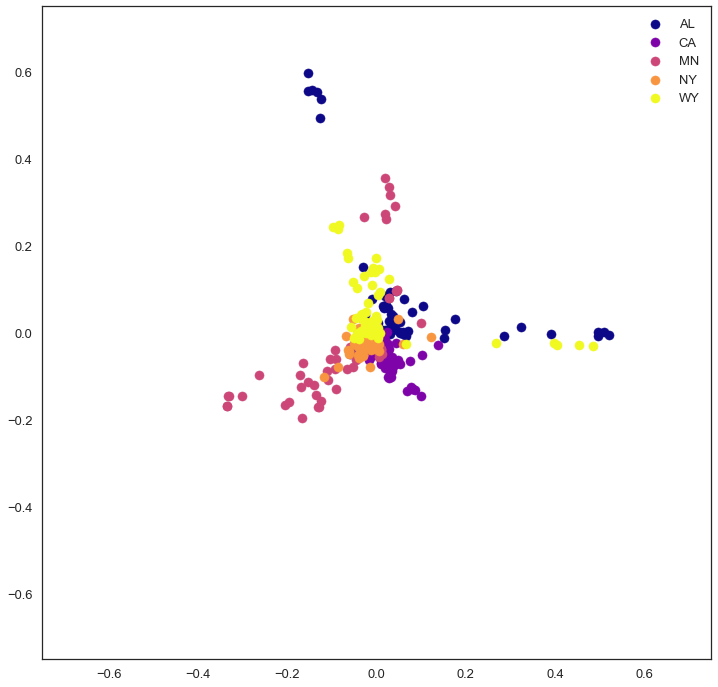

In [19]:
# converts a list of tuples to a dense NumPy array
def tuples_array(tuples_vector, length):
    arr = [0.0 for _ in range(length)]
    for col, val in tuples_vector:
        arr[col] = val
    return np.array(arr)

# convert text labels to ids
encoder = LabelEncoder()
categories_encoded = encoder.fit_transform(categories)
timeline_arrays = np.array([tuples_array(vector, lsi.num_topics) for \
                   vector in timeline_vectors])
labels = encoder.classes_

pca = PCA()
X_pca = pca.fit(timeline_arrays).transform(timeline_arrays)

plt.figure(figsize = (12,12))
#cmap = plt.get_cmap('tab20b_r')
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0,1,len(encoder.classes_)))

for color, i, label in zip(colors, range(len(encoder.classes_)), \
                           encoder.classes_):
    plt.scatter(
        X_pca[categories_encoded == i, 7], # x axis
        X_pca[categories_encoded == i, 6], # y axis 
        color = color,
        alpha = 1,
        lw = 0.5,
        label = label
    )
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.ylim(-0.75, 0.75)
plt.xlim(-0.75, 0.75)
plt.show()

(2, '-0.289*"police officers" + -0.266*"officers" + -0.144*"men women" + -0.144*"honoring" + -0.144*"overseeing given" + -0.144*"often work" + -0.144*"offenders suspected" + -0.144*"officers highlighted" + -0.144*"given attention" + -0.144*"highlighted bringing"')
(4, '-0.199*"net" + -0.186*"loss" + -0.159*"tweet" + -0.156*"net loss" + 0.104*"receive selection" + -0.103*"second quarter" + 0.093*"constitutes" + 0.093*"constitutes acceptance" + 0.093*"community rules" + 0.093*"local media"')


In [ ]:
#NOW STRUCTURE EVERYTHING UNDER: TOPIC (H1 TAG), CONTENT (ALL THE SENTENCES WITH ELECTRIC CAR)

